<a href="https://colab.research.google.com/github/alex-smith-uwec/NLP_Spring2025/blob/main/Meaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

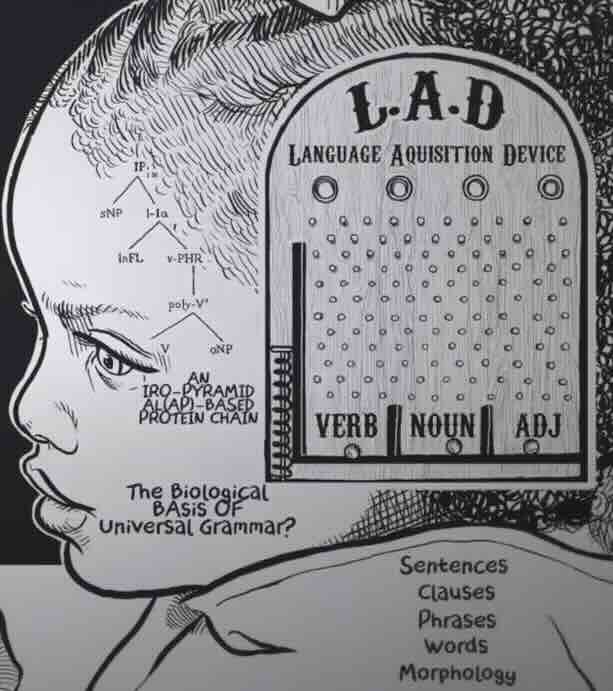


*   Part of speech tags
*   Constituency parsing
*   Dependency parsing
   






#[Brown Corpus](https://en.wikipedia.org/wiki/Brown_Corpus)

The first major corpus of English for computer analysis was the Brown Corpus developed at Brown University by Henry Kučera and W. Nelson Francis, in the mid-1960s. It consists of about 1,000,000 words of running English prose text, made up of 500 samples from randomly chosen publications.

The Brown Corpus was painstakingly "tagged" with part-of-speech markers over many years. A first approximation was done with a program by Greene and Rubin. The program got about 70% correct. Its results were repeatedly reviewed and corrected by hand, and later users sent in errata so that by the late 70s the tagging was nearly perfect.

In [2]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [3]:
from nltk.corpus import brown

In [4]:
categories = brown.categories()
categories


['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [9]:
words = brown.words(categories='news')  # Words from the category
print(words[:10])  # Display the first 10 words
print(f"number of words in category: {len(words)}")

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of']
number of words in category: 100554


In [10]:
sentences = brown.sents(categories='news')  # Sentences from category
print(sentences[:2])  # Display the first 2 sentences
print(f"number of sentences in category: {len(sentences)}")

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.']]
number of sentences in category: 4623


In [ ]:
tagged_words = brown.tagged_words(categories='news')
tagged_words[:10]  # Display the first 10 tagged words


[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN')]

Complete list of tags found here [Part-of-speech tags used in Brown Corpus](https://en.wikipedia.org/wiki/Brown_Corpus#Part-of-speech_tags_used)

In [ ]:
tagged_sentences = brown.tagged_sents(categories='news')
tagged_sentences[0:2]  # Display slice of tagged sentences

In [14]:
from nltk import FreqDist

# Frequency distribution of POS tags in the 'news' category
pos_tags = [tag for _, tag in brown.tagged_words(categories='news')]
tag_freq = FreqDist(pos_tags)
tag_freq.most_common(10)


[('NN', 13162),
 ('IN', 10616),
 ('AT', 8893),
 ('NP', 6866),
 (',', 5133),
 ('NNS', 5066),
 ('.', 4452),
 ('JJ', 4392),
 ('CC', 2664),
 ('VBD', 2524)]

Use AI to get code to generate a histogram of pos tags (top 10)

#[Treebanks](https://en.wikipedia.org/wiki/Treebank)

Treebanks are often created on top of a corpus that has already been annotated with part-of-speech tags. In turn, treebanks are sometimes enhanced with semantic or other linguistic information. Treebanks can be created completely manually, where linguists annotate each sentence with syntactic structure, or semi-automatically, where a parser assigns some syntactic structure which linguists then check and, if necessary, correct. In practice, fully checking and completing the parsing of natural language corpora is a labour-intensive project that can take teams of graduate linguists several years. The level of annotation detail and the breadth of the linguistic sample determine the difficulty of the task and the length of time required to build a treebank.

Penn Treebank:
* 40,000 sentences of WSJ newspaper text annotated with phrase-structure trees
*   Created in the early 1990s
* Produced by automatically parsing the newspaper sentences followed by manual correction
* Took around 3 years to create

The trees in Penn treebank show **constituency parsing** not dependency parsing.



In [16]:
import nltk
from nltk.corpus import treebank

# Download the 'treebank' dataset
nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [ ]:
# List of available files
files = treebank.fileids()
files[0:5]

['wsj_0001.mrg',
 'wsj_0002.mrg',
 'wsj_0003.mrg',
 'wsj_0004.mrg',
 'wsj_0005.mrg']

In [ ]:
# Load a sample tree from the Penn Treebank
tree = treebank.parsed_sents('wsj_0002.mrg')[0]
tree.pretty_print()

                                                                                                S                                                                                                
                                                ________________________________________________|______________________________________________________________________________________________   
                                               |                                                             VP                                                                                | 
                                               |                                                         ____|_____                                                                            |  
                                            NP-SBJ-1                                                    |          VP                                                                          | 
          __________________

In [ ]:
# Get the labels and structure
print(tree.label())  # Root label (e.g., 'S' for sentence)
print(tree.leaves())  # Words in the sentence
print(tree.subtrees())  # Access subtrees

# Example: Extract noun phrases
for subtree in tree.subtrees():
    if subtree.label() == 'NP':
        print(subtree)


S
['Rudolph', 'Agnew', ',', '55', 'years', 'old', 'and', 'former', 'chairman', 'of', 'Consolidated', 'Gold', 'Fields', 'PLC', ',', 'was', 'named', '*-1', 'a', 'nonexecutive', 'director', 'of', 'this', 'British', 'industrial', 'conglomerate', '.']
<generator object Tree.subtrees at 0x7f3c01e62f10>
(NP (NNP Rudolph) (NNP Agnew))
(NP (CD 55) (NNS years))
(NP
  (NP (JJ former) (NN chairman))
  (PP
    (IN of)
    (NP (NNP Consolidated) (NNP Gold) (NNP Fields) (NNP PLC))))
(NP (JJ former) (NN chairman))
(NP (NNP Consolidated) (NNP Gold) (NNP Fields) (NNP PLC))
(NP (DT a) (JJ nonexecutive) (NN director))
(NP (DT this) (JJ British) (JJ industrial) (NN conglomerate))


[Universal Dependencies](https://universaldependencies.org/)

Universal Dependencies (UD) is a framework for consistent annotation of grammar (parts of speech, morphological features, and syntactic dependencies) across different human languages. UD is an open community effort with over 600 contributors producing over 200 treebanks in over 150 languages

Passage taken from [For All x: Calgary ](https://forallx.openlogicproject.org/html/index.html) (See II.7)

In English, sentences can be ambiguous , i.e., they can have more than one meaning. There are many sources of ambiguity. One is lexical ambiguity: a sentence can contain words which have more than one meaning. For instance, ‘bank’ can mean the bank of a river, or a financial institution. So I might say that ‘I went to the bank’ when I took a stroll along the river, or when I went to deposit a check. Depending on the situation, a different meaning of ‘bank’ is intended, and so the sentence, when uttered in these different contexts, expresses different meanings.

A different kind of ambiguity is structural ambiguity. This arises when a sentence can be interpreted in different ways, and depending on the interpretation, a different meaning is selected. A famous example due to Noam Chomsky is the following:

​Flying planes can be dangerous.
There is one reading in which ‘flying’ is used as an adjective which modifies ‘planes’. In this sense, what’s claimed to be dangerous are airplanes which are in the process of flying. In another reading, ‘flying’ is a gerund: what’s claimed to be dangerous is the act of flying a plane. In the first case, you might use the sentence to warn someone who’s about to launch a hot air baloon. In the second case, you might use it to counsel someone against becoming a pilot.

When the sentence is uttered, usually only one meaning is intended. Which of the possible meanings an utterance of a sentence intends is determined by context, or sometimes by how it is uttered (which parts of the sentence are stressed, for instance). Often one interpretation is much more likely to be intended, and in that case it will even be difficult to “see” the unintended reading. This is often the reason why a joke works, as in this example from Groucho Marx:

​One morning I shot an elephant in my pajamas.

​How he got in my pajamas, I don’t know.

In [ ]:
!pip install spacy -q

In [ ]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
# doc = nlp("Flying planes can be dangerous.")
doc=nlp("They neither liked nor disliked the Old Man.")

In [ ]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

They they PRON PRP nsubj Xxxx True True
neither neither CCONJ CC preconj xxxx True True
liked like VERB VBD ROOT xxxx True False
nor nor CCONJ CC cc xxx True True
disliked dislike VERB VBD conj xxxx True False
the the DET DT det xxx True True
Old Old PROPN NNP compound Xxx True False
Man Man PROPN NNP dobj Xxx True False
. . PUNCT . punct . False False


In [ ]:
displacy.render(doc, style="dep")


[Stanza](https://stanfordnlp.github.io/stanza/)

**Stanza-A Python NLP Package for Many Human Languages**

Stanza is a collection of accurate and efficient tools for the linguistic analysis of many human languages. Starting from raw text, Stanza divides it into sentences and words, and then can recognize parts of speech and entities, do syntactic analysis, and more. Stanza brings state-of-the-art NLP models to languages of your choosing.